# **"Analyzing Churn Prediction Dataset and Prediction of Customer Behaviour"**

# Step 1: Understanding the Dataset
The provided dataset is a Churn Prediction Dataset from a bank. The goal is to predict whether a customer will leave the bank **(Exited = 1)** or stay **(Exited = 0)**. This is a supervised classification problem. The dataset contains 10,000 records with features such as customer demographics, financial details, and account activity.

- **Key Columns:**
1. **CreditScore:** Customer's credit score.
2. **Geography:** Country where the customer resides.
3. **Gender:** Male or Female.
4. **Age:** Customer's age.
5. **Tenure:** Number of years the customer has been with the bank.
6. **Balance:** Account balance.
7. **NumOfProducts:** Number of products the customer has subscribed to.
8. **HasCrCard:** Whether the customer has a credit card (1 = Yes, 0 = No).
9. **IsActiveMember:** Whether the customer is an active member (1 = Yes, 0 = No).
10. **EstimatedSalary:** Customer's estimated salary.
11. **Exited:** Target variable (1 = Customer exited, 0 = Customer stayed).

In [9]:
!pip install imbalanced-learn

In [10]:
import numpy as np
import pandas as pd
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# machine learning libraries
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn import datasets
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# **Exploratory Data Analysis (EDA)**

# Step 2: Exploring the Data
- Inspect the dataset
- Examine unique values
- Summary Statistics

In [11]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
df.shape

(10000, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Examine unique values of categorical features**

In [15]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Geography:
['France' 'Spain' 'Germany']

Unique values in Gender:
['Female' 'Male']

Unique values in HasCrCard:
[1 0]

Unique values in IsActiveMember:
[1 0]

Unique values in Exited:
[1 0]


**Summary Statistics**

In [16]:
# describe numric columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [17]:
# describe category columns
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**Imbalanced Data**

In [18]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


# Step 3: Data Cleaning
- Drop irrelevant columns
- Check for missing values
- Check for duplicate rows
- Analyze data types
- Check for Outliers

**Drop irrelevant columns**

In [19]:
df = df.drop(['RowNumber','Surname', 'CustomerId'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Check for missing values**

In [20]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


the dataset is clean

**Check for Duplicates**

In [21]:
df.duplicated().sum()

0

this dataset has no duplicated rows

**Analyze Data types**

In [22]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


Geography and Gender need to be encoded before modeling

**Check for Outliers**

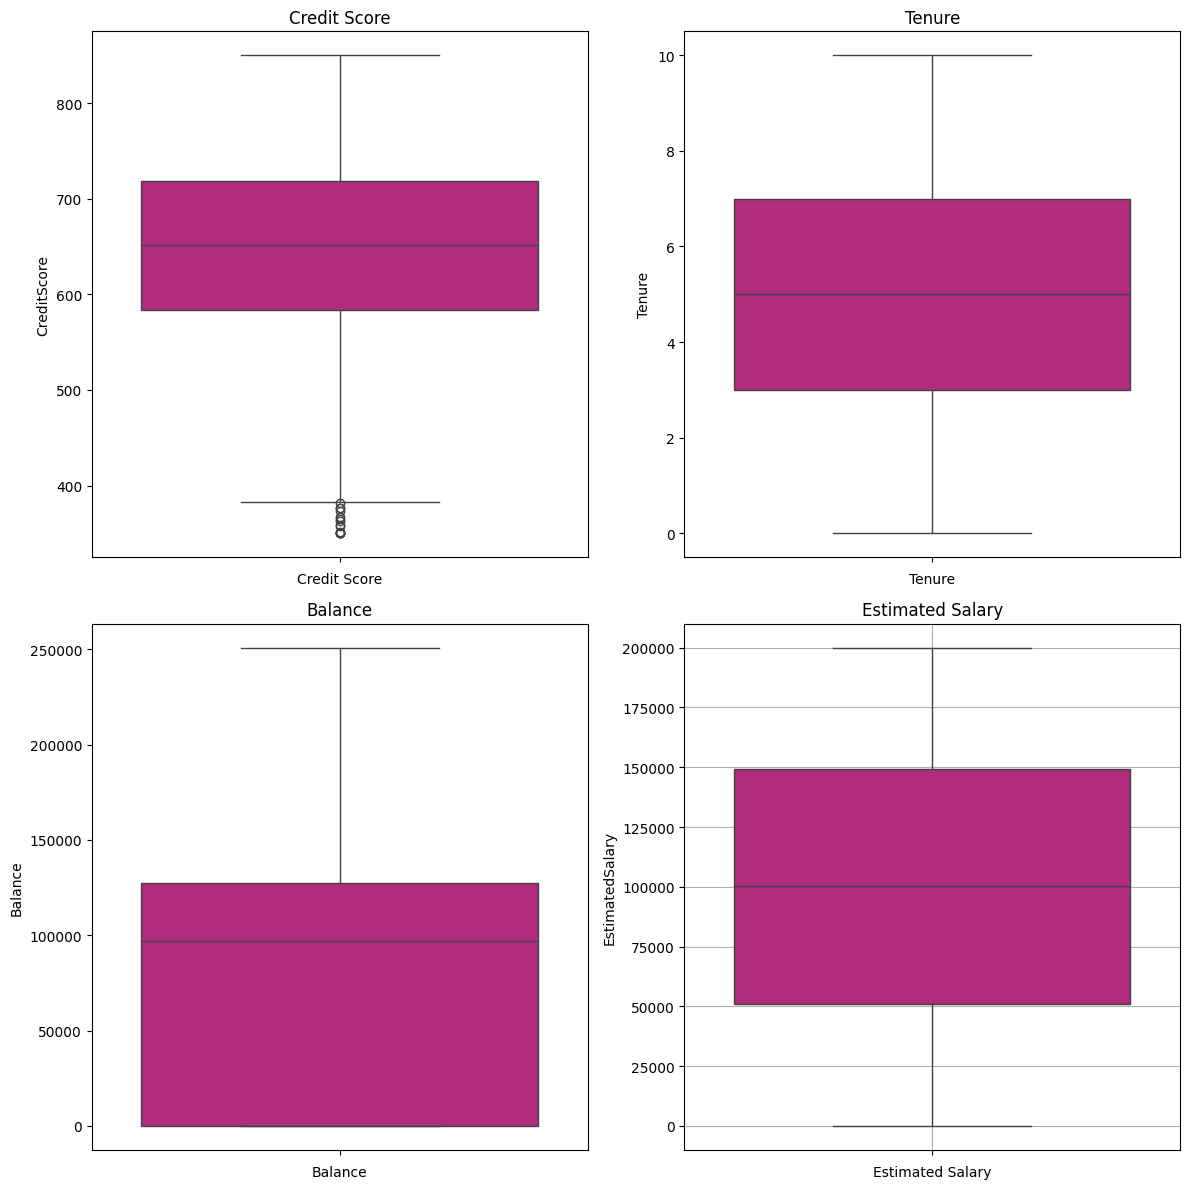

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.boxplot(df['CreditScore'], color='mediumvioletred', ax=axs[0][0])
axs[0][0].set_xlabel("Credit Score")
axs[0][0].set_title("Credit Score")

sns.boxplot(df['Tenure'], color='mediumvioletred', ax=axs[0][1])
axs[0][1].set_xlabel("Tenure")
axs[0][1].set_title("Tenure")

sns.boxplot(df['Balance'], color='mediumvioletred', ax=axs[1][0])
axs[1][0].set_xlabel("Balance")
axs[1][0].set_title("Balance")

sns.boxplot(df['EstimatedSalary'], color='mediumvioletred', ax=axs[1][1])
axs[1][1].set_xlabel("Estimated Salary")
axs[1][1].set_title("Estimated Salary")

plt.grid(True)
plt.tight_layout()

**Drop Outliers**

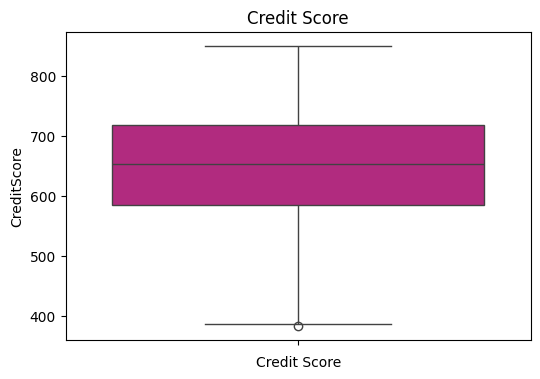

In [24]:
# Calculate the IQR for each numerical column and drop outliers
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Loop through each numerical column to remove outliers
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Calculate the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to keep only rows within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


plt.figure(figsize=(6, 4))  # Adjust the figure size as necessary
sns.boxplot(df['CreditScore'], color='mediumvioletred')

# Set the labels and title
plt.xlabel("Credit Score")
plt.title("Credit Score")

# Display the plot
plt.show()

# Step 4: Analysis and Visualization

**Histograms and Distributions**

In [25]:
# Create Subplots Layout (3 rows, 2 columns)
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'],
                    row_heights=[0.2, 0.2, 0.2], vertical_spacing=0.1)

# Numerical Columns for Histogram
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create Interactive Histograms for Numerical Features in Subplots
for i, col in enumerate(numerical_columns, 1):
    row = (i - 1) // 2 + 1  # Determine row index (1, 2, 3)
    col_index = (i - 1) % 2 + 1  # Determine column index (1, 2)

    # Create histogram
    histogram = go.Histogram(x=df[col], nbinsx=20, name=col,
                             marker=dict(color='coral'))

    # Add to the subplot
    fig.add_trace(histogram, row=row, col=col_index)

# Categorical Columns for Bar Plot
categorical_columns = ['Geography', 'Gender']

# Create Interactive Bar Plots for Categorical Features
for i, col in enumerate(categorical_columns, 1):
    row = 3  # Place categorical plots in the 3rd row
    col_index = i  # First categorical in first column, second in second column

    # Create bar plot
    bar_plot = go.Bar(x=df[col].value_counts().index,
                      y=df[col].value_counts().values,
                      name=col,
                      marker=dict(color='mediumvioletred'))

    # Add to the subplot
    fig.add_trace(bar_plot, row=row, col=col_index)

# Update Layout for better appearance
fig.update_layout(
    height=900,
    width=900,
    title_text="Distribution of Numerical and Categorical Features",
    showlegend=False,
    title_x=0.5
)

# Update axis labels
fig.update_xaxes(title_text="Value", row=1, col=1)
fig.update_xaxes(title_text="Value", row=1, col=2)
fig.update_xaxes(title_text="Value", row=2, col=1)
fig.update_xaxes(title_text="Value", row=2, col=2)
fig.update_xaxes(title_text="Value", row=3, col=1)
fig.update_xaxes(title_text="Value", row=3, col=2)

fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=2)
fig.update_yaxes(title_text="Count", row=3, col=1)
fig.update_yaxes(title_text="Count", row=3, col=2)

# Show the plot
fig.show()


**Count Plots**

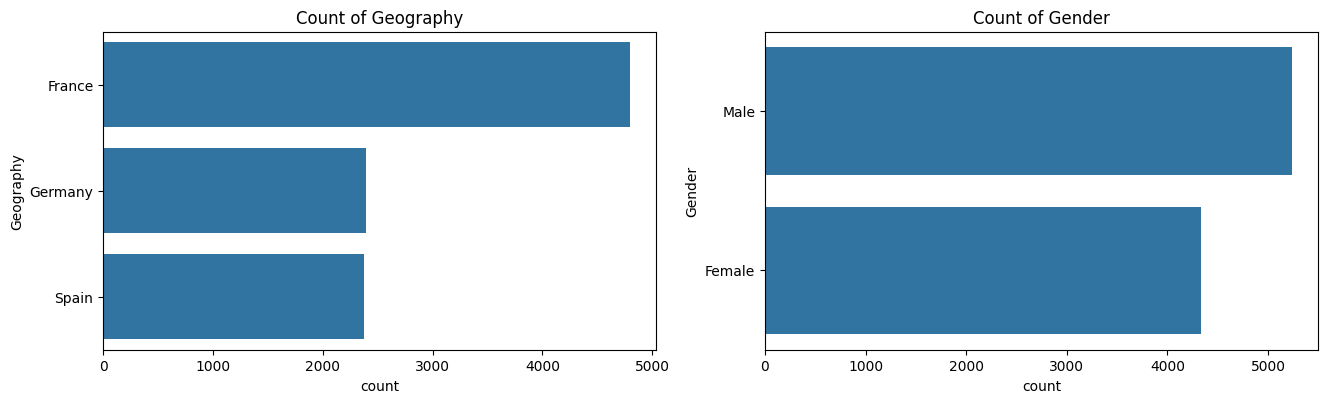

In [26]:
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(y=df[col], order=top_10_values)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

In [27]:
# Define categorical features
features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Create subplots layout (3 rows, 2 columns) to enlarge each figure
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=[f'{feature} vs. Exited' for feature in features],
                    row_heights=[0.3, 0.3, 0.3], vertical_spacing=0.15, horizontal_spacing=0.15)

# Loop over each feature
for i, feature in enumerate(features):
    # Group the data by the feature and 'Exited', and count the occurrences
    grouped = df.groupby([feature, 'Exited']).size().reset_index(name='Count')

    # Create a bar chart for Exited=0 (blue color)
    bar_chart_exited_0 = go.Bar(x=grouped[grouped['Exited'] == 0][feature],
                                y=grouped[grouped['Exited'] == 0]['Count'],
                                name=f'{feature} (Exited=0)',
                                marker=dict(color='mediumvioletred'))

    # Create a bar chart for Exited=1 (red color)
    bar_chart_exited_1 = go.Bar(x=grouped[grouped['Exited'] == 1][feature],
                                y=grouped[grouped['Exited'] == 1]['Count'],
                                name=f'{feature} (Exited=1)',
                                marker=dict(color='coral'))

    # Determine row and column index for subplot placement
    row = (i) // 2 + 1  # Calculate row index (3 rows)
    col = (i) % 2 + 1  # Calculate column index (2 columns)

    # Add the bar charts to the subplot
    fig.add_trace(bar_chart_exited_0, row=row, col=col)
    fig.add_trace(bar_chart_exited_1, row=row, col=col)

# Update layout
fig.update_layout(
    height=900,  # Adjusted height for larger plots
    width=800,   # Adjusted width for larger plots
    title_text="Side-by-Side Bar Charts for Categorical Features vs. Exited",
    barmode='group',  # Bars will appear side by side
    showlegend=True,
    title_x=0.5
)

# Show the plot
fig.show()



In [28]:
# Define colors and explode values for each pie chart
colors = {
    'HasCrCard': ['#1f77b4', '#ff7f0e'],
    'IsActiveMember': ['#2ca02c', '#d62728'],
    'NumOfProducts': ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],
    'Gender': ['#17becf', '#7f7f7f'],
    'Exited': ['#ffbb78', '#ff9896'],
    'Geography': ['#8c564b', '#e377c2', '#7f7f7f']
}

explode_values = {
    'HasCrCard': [0.1, 0],
    'IsActiveMember': [0, 0.1],
    'NumOfProducts': [0.1, 0, 0, 0],
    'Gender': [0.1, 0],
    'Exited': [0.1, 0],
    'Geography': [0.1, 0.1, 0]
}

# Create subplots layout (2 rows, 3 columns)
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=['Has Credit Card', 'Active Member', 'Number of Products',
                    'Gender', 'Exited', 'Geography'],
    row_heights=[0.2, 0.2], vertical_spacing=0.1, horizontal_spacing=0.1,
    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}],
           [{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]]
)

# List of columns and their titles
columns = ['HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Gender', 'Exited', 'Geography']

# Loop over each feature and create a pie chart for each
for i, column in enumerate(columns):
    # Get the counts of each unique value
    counts = df[column].value_counts()

    # Define the 'pull' values for explosion effect
    pull = explode_values[column] + [0] * (len(counts) - len(explode_values[column]))

    # Create a Pie chart trace
    pie_chart = go.Pie(
        labels=counts.index,
        values=counts,
        hole=0.3,  # For a donut chart effect
        title=f'{column} vs Exited',
        marker=dict(colors=colors[column]),
        pull=pull,  # Create the explosion effect
        textinfo='percent+label',  # Display percentage and label
        hoverinfo='label+percent',  # Show percentage on hover
        showlegend=False
    )

    # Determine row and column index for subplot placement
    row = (i) // 3 + 1  # Calculate row index (2 rows)
    col = (i) % 3 + 1  # Calculate column index (3 columns)

    # Add the pie chart to the subplot
    fig.add_trace(pie_chart, row=row, col=col)

# Update layout
fig.update_layout(
    height=800,
    width=900,
    title_text="Pie Charts for Categorical Features",
    title_x=0.5
)

# Show the plot
fig.show()


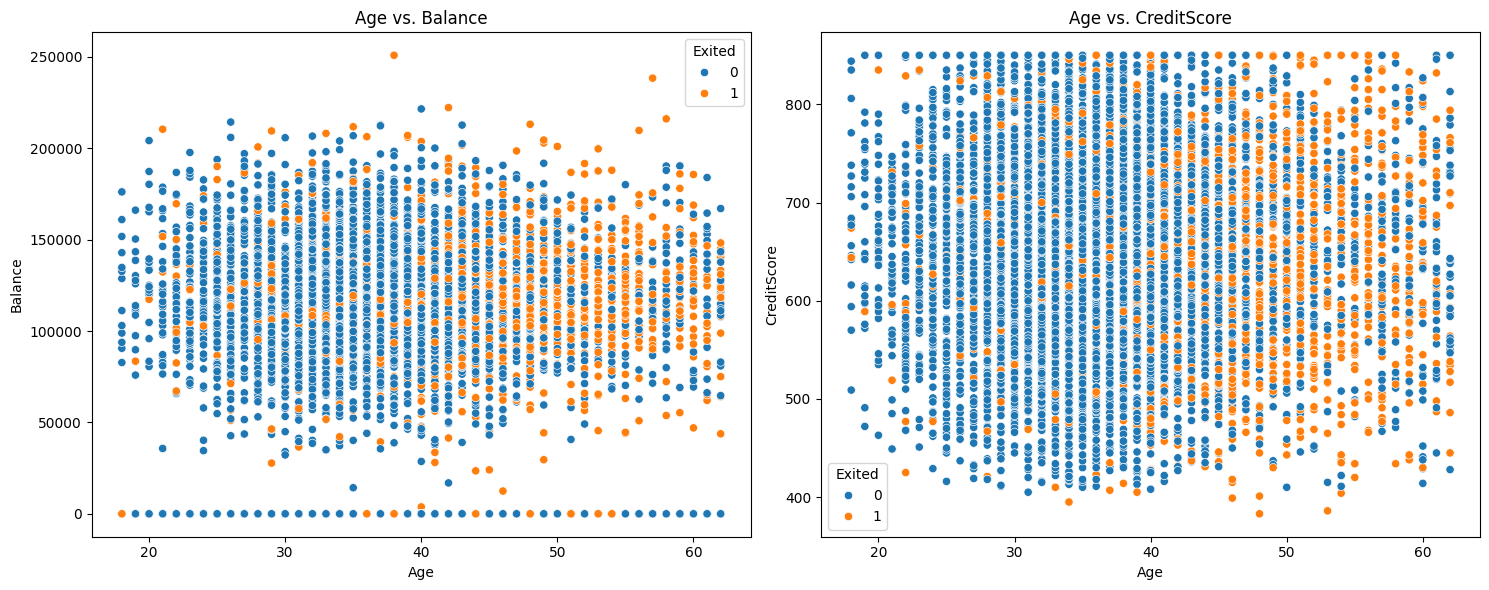

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, ax=axs[0])
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=df, ax=axs[1])

axs[0].set_title('Age vs. Balance')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Balance')
axs[1].set_title('Age vs. CreditScore')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('CreditScore')

plt.tight_layout()
plt.show()

## Correlation Analysis

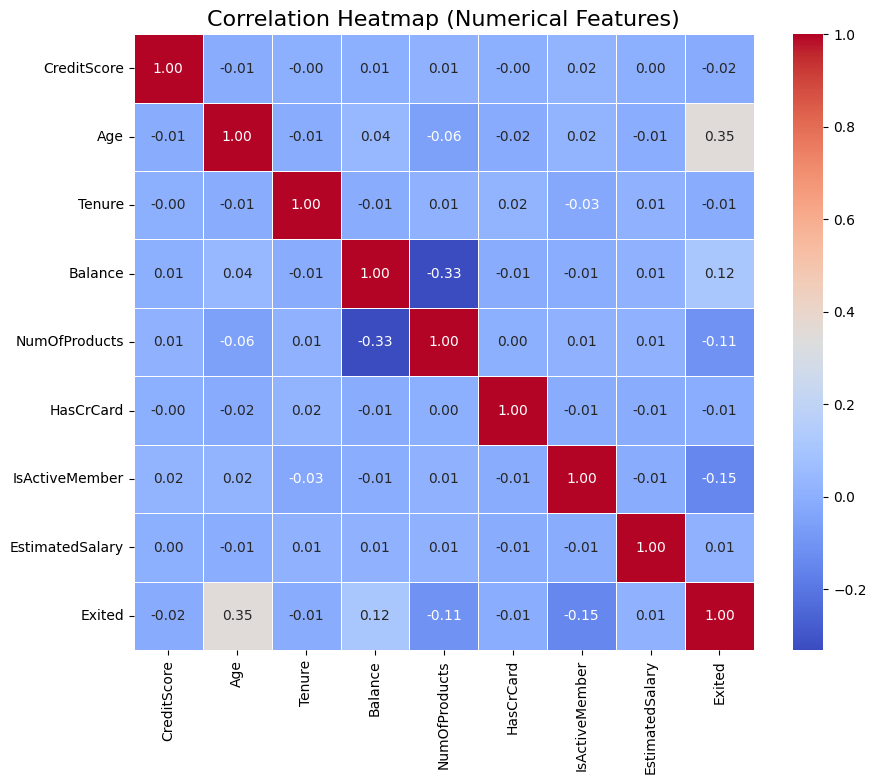

In [30]:
# Select numerical columns only
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical features
corr_matrix = numerical_features.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)", fontsize=16)
plt.show()


there is a weak correlation between all features

# Step 5: One-Hot Encoding
- What it does: One-Hot Encoding creates a binary column for each category in a categorical feature. For example, Geography with values France, Spain, and Germany would be split into three columns: Geography_France, Geography_Spain, and Geography_Germany.
- Best for: Non-ordinal categorical data, where no natural order exists between the categories.
- Why it's better for non-ordinal data: Since each category is represented by a separate column, One-Hot Encoding avoids introducing any unintended ordinal relationships.
- Good for: Geography, Gender.

In [31]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df = df.astype('int64')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


# Step 6: Standarization (Z-score scaling)
Naive Bayes works well when the features follow a Gaussian (normal) distribution. Standardization (Z-score scaling) will help achieve that by centering the features around zero and adjusting them to a consistent scale. For example, if CreditScore or Age is approximately normal, standardization will improve model performance.

**What to Do:**
- Apply standardization (Z-score scaling) to your numerical features before applying Naive Bayes.
- For categorical variables (like Geography and Gender), you’ve already applied one-hot encoding, which is fine for Naive Bayes.

In [32]:
# Selecting numerical columns for standardization
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initializing the StandardScaler
scaler = StandardScaler()

# Applying standardization to the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Displaying the first few rows to verify the scaling
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.329808,0.485534,-1.044203,-1.224650,-0.938614,1,1,0.021806,1,0,0,0
1,-0.444286,0.371671,-1.390497,0.118137,-0.938614,0,1,0.216417,0,0,1,0
2,-1.547436,0.485534,1.033562,1.333483,2.699489,1,0,0.240565,1,0,0,0
3,0.502758,0.143947,-1.390497,-1.224650,0.880438,0,0,-0.108966,0,0,0,0
4,2.074226,0.599396,-1.044203,0.786318,-0.938614,1,1,-0.365259,0,0,1,0


# Step 7: Apply Machine Learning Algorithms

## - Naive Bayes
1. Split Data into train (80%) and test (20%)
2. Implement Naive Bayes Algorithm (Train model)
3. Apply the Trained Model to the Test Set
4. Evaluate its Performance (from confusion matrix calculate accuracy, precision, recall, and F1-score)
5. Discuss Strengths and Weaknesses of Naive Bayes

In [33]:
# Select features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model.score(X_test, y_test)

0.8261929641239986

In [35]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2153,  143],
       [ 356,  219]])

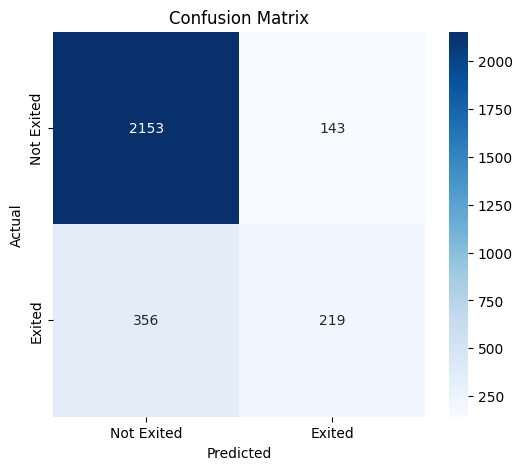

In [37]:
# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Metrics Calculation:**
- **Accuracy:** The proportion of correctly predicted instances.
- **Precision:** The proportion of positive predictions that are actually correct.
- **Recall:** The proportion of actual positives that are correctly identified.
- **F1-score:** The harmonic mean of precision and recall. It's useful when the dataset is imbalanced.
- **Support:** The number of actual instances in each class.

In [38]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 Score, and Support
report = classification_report(y_test, y_pred, target_names=['Not Exited', 'Exited'], output_dict=True)
precision = report['Exited']['precision']
recall = report['Exited']['recall']
f1_score = report['Exited']['f1-score']

# Display results
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy)
print("Precision (Exited):", precision)
print("Recall (Exited):", recall)
print("F1-Score (Exited):", f1_score)

Confusion Matrix:
 [[2153  143]
 [ 356  219]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      2296
           1       0.60      0.38      0.47       575

    accuracy                           0.83      2871
   macro avg       0.73      0.66      0.68      2871
weighted avg       0.81      0.83      0.81      2871


Accuracy: 0.8261929641239986
Precision (Exited): 0.6049723756906077
Recall (Exited): 0.3808695652173913
F1-Score (Exited): 0.46744930629669157


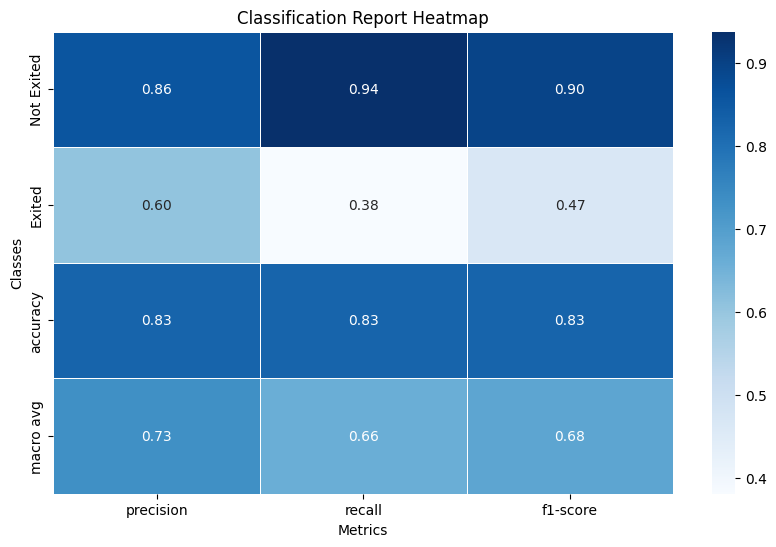

In [39]:
# Convert to DataFrame for plotting
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

### Explanation of the Classification Report

The classification report evaluates the performance of your classification model using various metrics for each class. Here's the explanation based on the new values:

---

#### Metrics Per Class
1. **Precision**:
   - **Interpretation**: Precision measures how many of the predicted positive cases were actually correct.
     - For class `0`: \( 0.86 \) → Out of all predictions for class `0`, 86% were correct.
     - For class `1`: \( 0.60 \) → Out of all predictions for class `1`, 60% were correct.

2. **Recall**:
   - **Interpretation**: Recall measures how many of the actual positive cases were identified correctly.
     - For class `0`: \( 0.94 \) → 94% of actual class `0` samples were correctly classified.
     - For class `1`: \( 0.38 \) → Only 38% of actual class `1` samples were correctly classified.

3. **F1-Score**:
   - **Interpretation**: F1-score is the harmonic mean of precision and recall, balancing the trade-off between the two.
     - For class `0`: \( 0.90 \) → High F1-score indicates a good balance between precision and recall.
     - For class `1`: \( 0.47 \) → Lower F1-score reflects the challenges of identifying class `1` accurately.

4. **Support**:
   - **Definition**: The number of actual instances of each class in the dataset.
     - For class `0`: \( 2296 \) → There are 2296 actual samples of class `0`.
     - For class `1`: \( 575 \) → There are 575 actual samples of class `1`.

---

#### Overall Metrics
1. **Accuracy**:
   - **Value**: \( 0.83 \) → The model correctly classified 83% of all samples.

2. **Macro Average**:
   - **Definition**: The average of the metric (precision, recall, or F1-score) calculated independently for each class.
     - Precision: \( 0.73 \) → Average precision across class `0` and class `1`.
     - Recall: \( 0.66 \) → Average recall across class `0` and class `1`.
     - F1-Score: \( 0.68 \) → Average F1-score across class `0` and class `1`.

3. **Weighted Average**:
   - **Definition**: The average of the metric (precision, recall, or F1-score), weighted by the support of each class.
     - Precision: \( 0.81 \) → Weighted by the fact that class `0` has more samples than class `1`.
     - Recall: \( 0.83 \) → Matches the overall accuracy since recall includes true negatives.
     - F1-Score: \( 0.81 \) → Weighted F1-score balances the performance across the two classes.

---

### Observations
1. **Class `0` performs well**:
   - High precision (\(0.86\)) and recall (\(0.94\)) for class `0` indicate the model is highly effective at identifying and predicting this class.
   
2. **Class `1` struggles**:
   - Lower precision (\(0.60\)) and recall (\(0.38\)) for class `1` indicate the model misses many actual class `1` samples (high false negatives) and misclassifies other samples as class `1`.

---

### Insights
- The model is biased towards class `0`, likely due to class imbalance (2296 vs. 575).

---


### Strengths and Weaknesses of Naive Bayes:
1. **Strengths:**
- Simplicity: Naive Bayes is simple to understand and implement.
- Efficiency: It is computationally efficient and works well with large datasets.
- Scalability: Can handle a large number of features effectively.
- Performance with High Dimensionality: It works well with text classification and other high-dimensional data.
2. **Weaknesses:**
- Independence Assumption: Naive Bayes assumes features are conditionally independent, which is often not true in real-world data. This assumption may lead to suboptimal performance if features are highly correlated.
- Limited Expressiveness: Since Naive Bayes is a probabilistic classifier, it might not perform well if the true distribution of the data is very different from the one assumed by the algorithm.
- Difficulty Handling Numerical Features with Skewed Distributions: Naive Bayes assumes that numerical features follow a Gaussian distribution, so it might struggle with features that do not fit this assumption.

**Decision Tree**

In [40]:
# split the data
X = df.drop('Exited', axis=1)
y = df['Exited']

#split the data into training set and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

#splitting the temporary set into validation set and test set
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12, stratify=y_temp)

In [41]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)

#train the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Testing our model against the validation set

In [42]:
y_pred = tree.predict(X_val)

#evaluation metrics
report = classification_report(y_val, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       768
           1       0.67      0.39      0.49       189

    accuracy                           0.84       957
   macro avg       0.77      0.67      0.70       957
weighted avg       0.83      0.84      0.82       957



Evaluation metrics for the validation set predictions.

In [43]:
from sklearn.metrics import f1_score

accuracy = round(accuracy_score(y_val, y_pred),3)
print(f"Accuracy: {accuracy}")
precision = round(precision_score(y_val, y_pred),3)
print(f"Precision: {precision}")
recall = round(recall_score(y_val, y_pred),3)
print(f"Recall: {recall}")
f1 = round(f1_score(y_val, y_pred),3)
print(f"F1-Score: {f1}")


Accuracy: 0.841
Precision: 0.667
Recall: 0.392
F1-Score: 0.493


In [44]:
#Confusion Matrix
conf_mat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix: \n" , conf_mat)

Confusion Matrix: 
 [[731  37]
 [115  74]]


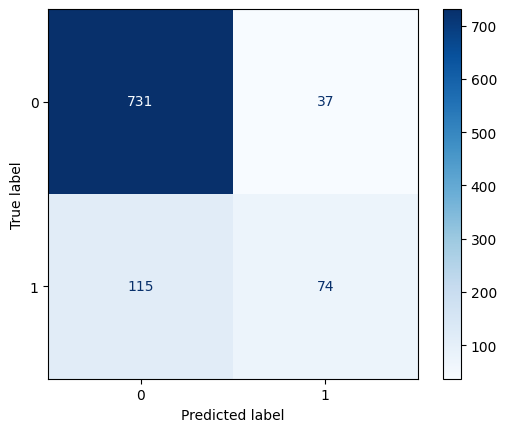

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap='Blues')
plt.show()

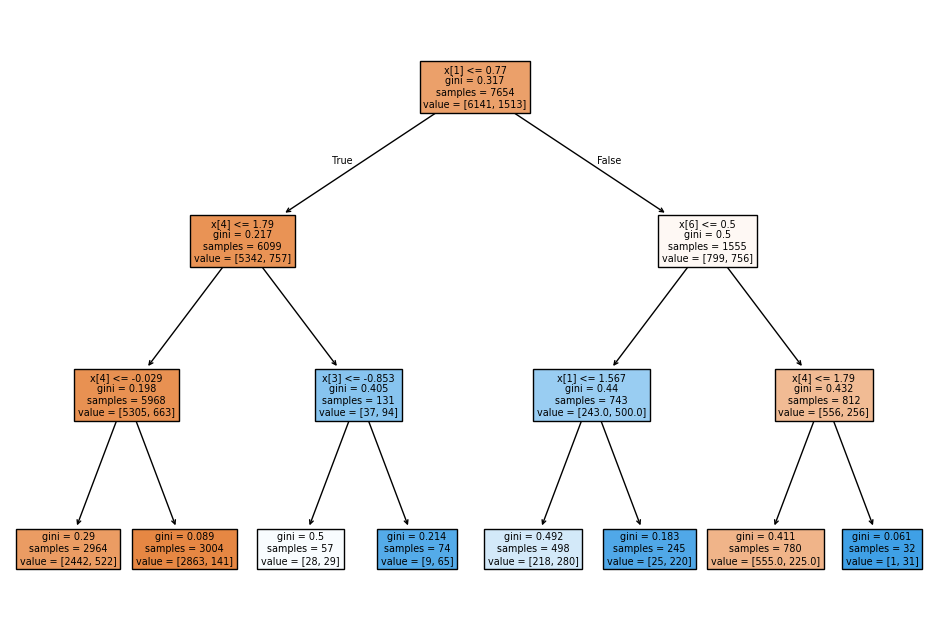

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree, filled=True)
plt.show()

Using Grid Search to Fine-Tune the hyperparameter

In [47]:
from sklearn.model_selection import GridSearchCV

grid= {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [5, 10, 15, 20],
    'max_depth':[5, 10, 15],
    'min_samples_leaf': [5, 10, 15, 20]
}

grid_search = GridSearchCV(estimator=tree, param_grid=grid,
                            scoring='accuracy',  cv=5, verbose=1, n_jobs=-1)

The reason why we specified recall as our score metric is because we'd like the model to return *more* relevant results even if they were less accurate, because given our problem here it's better to wrongly identify customers with low risk as high risk than the other way around.

In [48]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'max_leaf_nodes': [5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [49]:
best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Recall:", grid_search.best_score_)

print("Best Model Accuracy: ", best_model.score(X_val, y_val))

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 5}
Best Cross-Validation Recall: 0.8591594199186314
Best Model Accuracy:  0.8557993730407524


Somewhat better than the first model

Now testing our best model against the test set

In [50]:
y_pred = best_model.predict(X_test)

#evaluation metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       768
           1       0.62      0.39      0.48       189

    accuracy                           0.83       957
   macro avg       0.74      0.67      0.69       957
weighted avg       0.81      0.83      0.82       957



In [51]:
accuracy = round(accuracy_score(y_test, y_pred),3)
print(f"Accuracy: {accuracy}")
precision = round(precision_score(y_test, y_pred),3)
print(f"Precision: {precision}")
recall = round(recall_score(y_test, y_pred),3)
print(f"Recall: {recall}")
f1 = round(f1_score(y_test, y_pred),3)
print(f"F1-Score: {f1}")


Accuracy: 0.832
Precision: 0.617
Recall: 0.392
F1-Score: 0.479


In [52]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n" , conf_mat)

Confusion Matrix: 
 [[722  46]
 [115  74]]


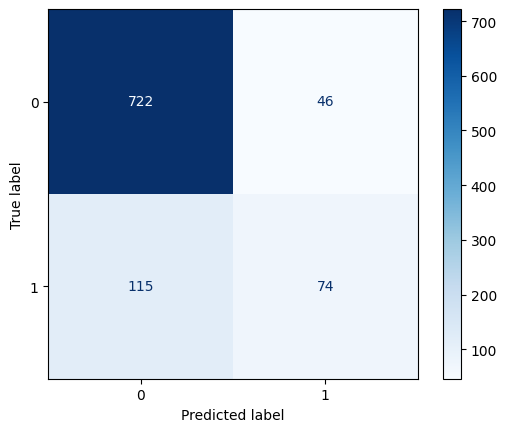

In [53]:
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap='Blues')
plt.show()

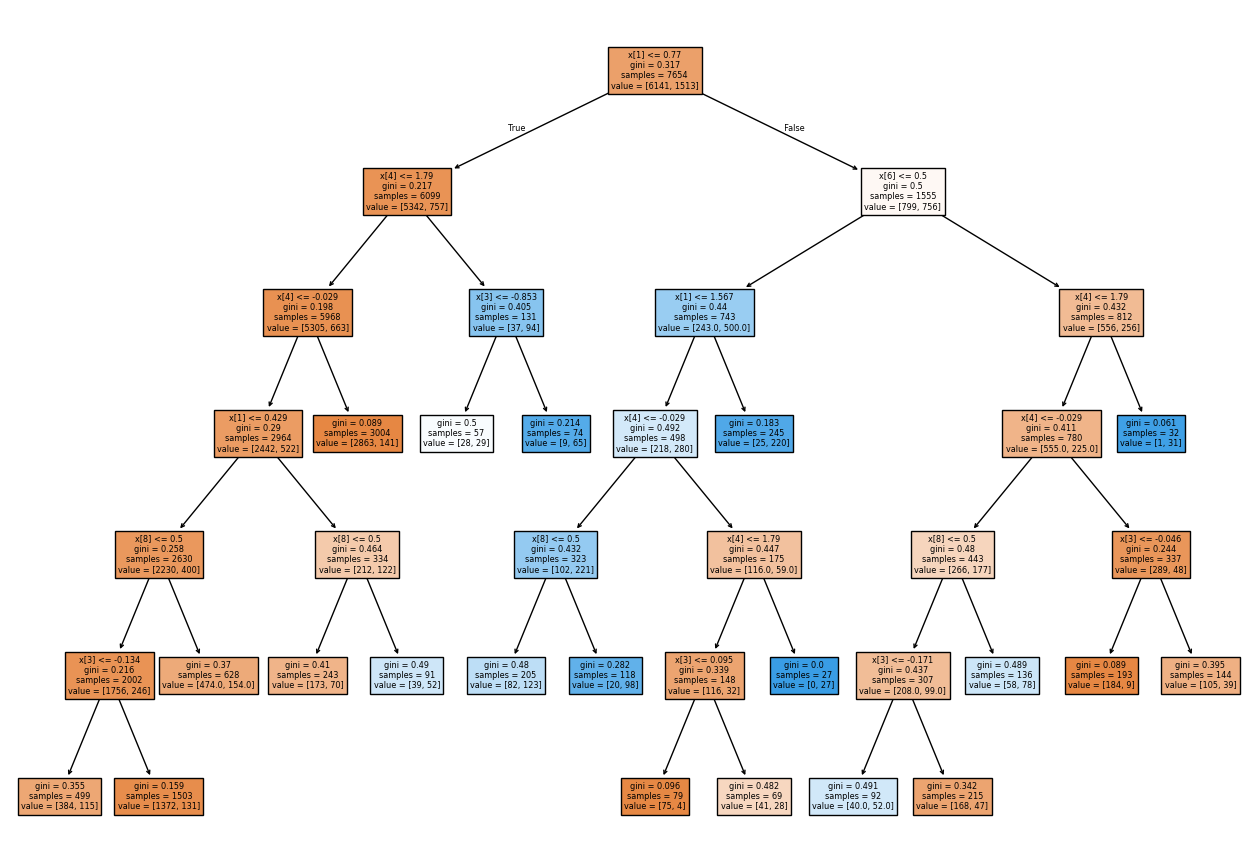

In [54]:
plt.figure(figsize=(16,11))
plot_tree(best_model, filled=True)
plt.show()

## KNN

1. Select the number of neighbors (K) to consider for the algorithm. Commonly, K is set to a small odd number.  
2. For a given test point, compute the distance (e.g., Euclidean, Manhattan) between the test point and all training points.  
3. Sort the distances and select the K closest points from the training dataset.  
4. Determine the most frequent class label among the K neighbors (majority voting).  
5. Calculate the average or weighted average of the target values of the K neighbors.  
6. Assign the class (classification) to the test point based on the result of the voting or averaging.  
7. Repeat the process for all test points to complete the predictions.

In [55]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.329808,0.485534,-1.044203,-1.224650,-0.938614,1,1,0.021806,1,0,0,0
1,-0.444286,0.371671,-1.390497,0.118137,-0.938614,0,1,0.216417,0,0,1,0
2,-1.547436,0.485534,1.033562,1.333483,2.699489,1,0,0.240565,1,0,0,0
3,0.502758,0.143947,-1.390497,-1.224650,0.880438,0,0,-0.108966,0,0,0,0
4,2.074226,0.599396,-1.044203,0.786318,-0.938614,1,1,-0.365259,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.252067,0.143947,-0.005320,-1.224650,0.880438,1,0,-0.066476,0,0,0,1
9996,-1.401737,-0.311503,1.726151,-0.305462,-0.938614,1,1,0.027909,0,0,0,1
9997,0.606829,-0.197641,0.687268,-1.224650,-0.938614,0,1,-1.008497,1,0,0,0
9998,1.262474,0.485534,-0.697909,-0.021770,0.880438,1,0,-0.125273,1,1,0,1


### Step 1: Split the data into features (X) and target (y)

In [56]:
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

### Step 2: Split the data into training, validation and testing sets
(e.g., 70% train, 15% validation, 15% test)

In [57]:
# First split: 70% training, 30% (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the 30% into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Step 4: Applying different k-values with different distance metric

**1- Euclidean distance (default)**

In [58]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_knn(X_train, y_train, X_val, y_val, metric, k_values):
    results = {}

    for k in k_values:
        # Initialize KNN model with the specified metric and current k value
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # Train the model
        knn.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = knn.predict(X_val)

        # Evaluate performance
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Store results
        results[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

    # Return results as a DataFrame
    return pd.DataFrame(results).T

# Example usage
k_values = [3, 5, 7, 9]
metric = 'euclidean'

euclidean_results_df = evaluate_knn(X_train, y_train, X_val, y_val, metric, k_values)
print(euclidean_results_df)

   accuracy  precision    recall  f1_score
3  0.843206   0.635922  0.466192  0.537988
5  0.857143   0.695876  0.480427  0.568421
7  0.859233   0.723164  0.455516  0.558952
9  0.860627   0.736842  0.448399  0.557522


In [59]:
def plot_knn_metrics(k_values, results_df):

    # Define colors for each metric
    colors = {
        'accuracy': 'royalblue',
        'precision': 'seagreen',
        'recall': 'firebrick',
        'f1_score': 'darkorange'
    }

    # Create the figure
    fig = go.Figure()

    # Add each metric to the same plot
    for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
        fig.add_trace(
            go.Scatter(
                x=k_values, y=results_df[metric],
                mode='lines+markers',
                marker=dict(size=8, color=colors[metric]),
                line=dict(width=2, color=colors[metric]),
                name=metric.capitalize()
            )
        )

    # Update layout for clarity
    fig.update_layout(
        title="Performance Metrics vs. k Value",
        title_font=dict(size=20, family='Arial, sans-serif'),
        xaxis_title="k Value",
        yaxis_title="Metric Value",
        height=600, width=800,
        legend_title="Metrics",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

# Example usage:
plot_knn_metrics(k_values, euclidean_results_df)


- **Accuracy**: (highest at k=9) Shows a slight increase, suggesting that higher k values help improve generalization.
- **Precision**: (highest at k=9) Improves as k increases, indicating that the model is more effective at correctly identifying positive samples.
- **Recall**: (highest at k=5) Decreases with larger k values, meaning the model is missing more positive samples.
- **F1-Score**: (highest at k=5) Increases initially at k=5 but then drops, reflecting the trade-off between precision and recall.

**Key takeaway**: k=5 strikes a good balance, offering the highest F1-score (0.5684) and making it a strong candidate for model optimization. If precision is more important, larger k values (like k=9) may be preferred. However, for better recall, smaller k values should be prioritized.

Since churn prediction focuses on identifying positive cases (churners), it's crucial to stick with smaller k values when using Euclidean distance to improve recall.

**2- Manhattan distance**

In [60]:
metric = 'manhattan'

manhattan_results_df = evaluate_knn(X_train, y_train, X_val, y_val, metric, k_values)
print(manhattan_results_df)

   accuracy  precision    recall  f1_score
3  0.840418   0.623810  0.466192  0.533605
5  0.853659   0.689840  0.459075  0.551282
7  0.861324   0.762821  0.423488  0.544622
9  0.860627   0.775510  0.405694  0.532710


In [61]:
plot_knn_metrics(k_values, manhattan_results_df)

- **Accuracy**: (highest at k=9) Shows a slight increase, suggesting that higher k values contribute to better generalization.
- **Precision**: (highest at k=9) Increases with larger k values, indicating the model becomes more accurate in identifying positive samples.
- **Recall**: (highest at k=3) Decreases as k increases.
- **F1-Score**: (highest at k=5) Increases initially at k=5 but then decreases, reflecting the trade-off between precision and recall.

**Key takeaway**: Using Manhattan distance, k=5 achieves the best F1-score (0.5513), making it a balanced choice. However, since recall is more critical for churn prediction, smaller k values should be prioritized.

**3- Chebyshev distance**

In [62]:
metric = 'chebyshev'

chebyshev_results_df = evaluate_knn(X_train, y_train, X_val, y_val, metric, k_values)
print(chebyshev_results_df)

   accuracy  precision    recall  f1_score
3  0.835540   0.602740  0.469751  0.528000
5  0.852265   0.692737  0.441281  0.539130
7  0.857143   0.720930  0.441281  0.547461
9  0.857840   0.739130  0.423488  0.538462


In [63]:
plot_knn_metrics(k_values, chebyshev_results_df)

- **Accuracy**: (highest at k=7) Gradually improves with higher k values, indicating better generalization as k increases.  
- **Precision**: (highest at k=9) Increases with larger k values, showing the model becomes more accurate in identifying positive samples.  
- **Recall**: (highest at k=3) Decreases as k increases, suggesting the model misses more positive cases with larger k.  
- **F1-Score**: (highest at k=7) Peaks at k=7, reflecting a better balance between precision and recall at this value.  

**Key takeaway**: Using Chebyshev distance smaller k values like k=3 may be more appropriate to prioritize capturing more churners.

**4- minkowski distance (p=3)**

In [64]:
k_values = [3, 5, 7, 9]
metric = 'minkowski'

results = {}
for k in k_values:
    # Initialize KNN model with the specified metric and current k value
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric,p=3)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = knn.predict(X_val)

    # Evaluate performance
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store results
    results[k] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Display results as a DataFrame
minkowski_results_df = pd.DataFrame(results).T
print(minkowski_results_df)

   accuracy  precision    recall  f1_score
3  0.852962   0.662037  0.508897  0.575453
5  0.852962   0.680412  0.469751  0.555789
7  0.857143   0.706522  0.462633  0.559140
9  0.861324   0.738372  0.451957  0.560706


In [65]:
plot_knn_metrics(k_values, minkowski_results_df)

- **Accuracy**: (highest at k=9) Gradually improves with larger k values, indicating better overall generalization.  
- **Precision**: (highest at k=9) Increases as k grows, meaning the model becomes better at correctly identifying positive samples.  
- **Recall**: (highest at k=3) Reaches its peak value, highlighting the model's ability to capture the most positive cases at this k. However, recall decreases as k increases.  
- **F1-Score**: (highest at k=3) Peaks initially and then declines slightly, reflecting a trade-off between precision and recall.  

**Key takeaway**: Using Minkowski distance, the model achieves the **highest recall** at k=3 and the highest F1-score (0.5755) at the same value. Since recall is critical for churn prediction to identify as many churners as possible, smaller k values like k=3 should be prioritized.

**Impact of Distance Metrics:**

- The choice of distance metric (Euclidean, Manhattan, Chebyshev, Minkowski) significantly influenced the KNN model's performance across all evaluation metrics.

- Minkowski Distance  achieved the highest recall of 0.508, which is crucial for identifying churners in an imbalanced dataset. This makes it the best-performing metric when prioritizing recall.

- Chebyshev Distance also performed reasonably well at k=3 , providing a recall of 0.494. However, its overall F1-score and precision were slightly lower compared to Minkowski.

- Euclidean Distance and Manhattan Distance had lower recall values overall, indicating that they are less effective for the minority class (churners) in this dataset.

**Impact of k-values:**

- Smaller k values (e.g., ) resulted in higher recall. This is because smaller neighborhoods are more sensitive to the minority class, making it easier to detect churners.

- As  increases (e.g., ), recall tends to decrease, while accuracy and precision improve. This happens because larger  values smooth the decision boundary, favoring predictions for the majority class.

- For example, under the Minkowski distance, recall drops from 0.508 at k=3 to 0.451 at k=5 .



**Imbalanced Data Consideration:**

We can notice the imbalanced nature of the dataset has a significant impact on recall. KNN tends to favor the majority class, which reduces the model’s ability to identify churners.

### Step 5: Final decision

In [66]:
# Store recall values for each distance metric in dictionaries
recall_values = {
    'euclidean': euclidean_results_df['recall'],
    'manhattan': manhattan_results_df['recall'],
    'minkowski': minkowski_results_df['recall'],
    'chebyshev': chebyshev_results_df['recall']
}

# Step 1: Find the best k for each distance metric based on recall
best_k_per_metric = {}
for metric, recalls in recall_values.items():
    best_k = recalls.idxmax()  # Get the index (k value) of the highest recall
    best_k_per_metric[metric] = best_k

# Step 2: Find the overall best k based on the highest recall across all metrics
best_metric = max(recall_values, key=lambda metric: recall_values[metric].max())
overall_best_k = best_k_per_metric[best_metric]
overall_best_recall = recall_values[best_metric].max()

# Step 3: Print results
print("Best k for each metric based on recall:")
for metric, best_k in best_k_per_metric.items():
    print(f"{metric.capitalize()} - Best k: {best_k}")

print(f"\nOverall best k based on recall: {overall_best_k} ({best_metric.capitalize()} - Recall: {overall_best_recall:.4f})")

Best k for each metric based on recall:
Euclidean - Best k: 5
Manhattan - Best k: 3
Minkowski - Best k: 3
Chebyshev - Best k: 3

Overall best k based on recall: 3 (Minkowski - Recall: 0.5089)


In [67]:
# Step 1: Prepare the data
data = {
    "Metric": list(best_k_per_metric.keys()),
    "Best k": list(best_k_per_metric.values()),
    "Recall at Best k": [recall_values[metric].loc[best_k]
                         for metric, best_k in best_k_per_metric.items()]
}

results = pd.DataFrame(data)

# Step 2: Create the bar plot
fig = px.bar(
    results,
    x="Metric",
    y="Recall at Best k",
    text="Best k",
    color="Metric",
    color_discrete_sequence=['royalblue', 'seagreen', 'firebrick', 'darkorange', 'gold'],
    title="Best k Values for Each Metric Based on Recall"
)

# Step 3: Customize text, layout, and bar width
fig.update_traces(textposition='outside')
fig.update_layout(
    width=700,
    margin=dict(l=50, r=50, t=50, b=50),
    xaxis_title="Distance Metric",
    yaxis_title="Recall",
    template="plotly_white",
    showlegend=False,
    bargap=0.8  # Adjust the gap between bars (values closer to 1 mean more gap)
)

# Step 4: Show the plot
fig.show()


### Step 6: Applying the model to the testing set

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1142
           1       0.58      0.43      0.50       294

    accuracy                           0.82      1436
   macro avg       0.72      0.68      0.69      1436
weighted avg       0.81      0.82      0.81      1436


Example predictions:
[0 0 0 0 0 0 1 1 0 1]

The recall on the test set: 0.4320


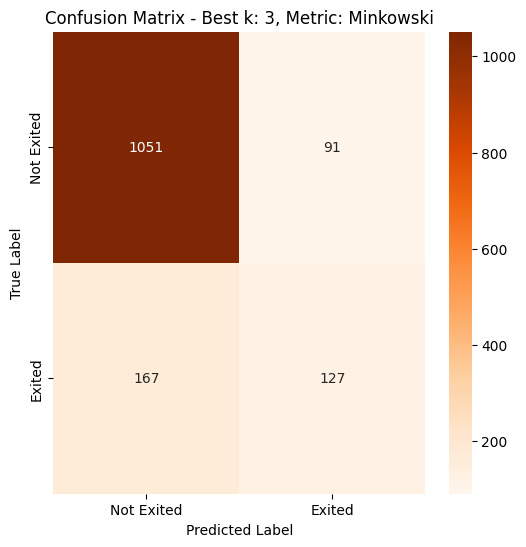

In [68]:
# Step 1: Initialize the KNN model with the best k and best metric
best_k = 3  # Example best k
best_metric = 'minkowski'  # Example best distance metric

knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

# Step 2: Train the model on the training set (if not already trained)
knn.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_test = knn.predict(X_test)

# Step 4: Evaluate performance on the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

# Step 5: Optionally, view some predictions
print("\nExample predictions:")
print(y_pred_test[:10])  # Print first 10 predictions

# Calculate recall on the test set
recall = recall_score(y_test, y_pred_test)
print(f"\nThe recall on the test set: {recall:.4f}")

# Step 6: Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Not Exited", "Exited"], yticklabels=["Not Exited", "Exited"])
plt.title(f"Confusion Matrix - Best k: {best_k}, Metric: {best_metric.capitalize()}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The KNN algorithm achieved a recall value of 0.432 when applied to the testing data. This was accomplished by training the dataset and evaluating performance based on recall, as the focus was on identifying churned customers (exited = 1). We explored various distance metrics and key values, ultimately choosing the Minkowski distance with p=3 and k=3.

## - SVM

### sequence of work
select the most effective feature to use.

Split the Dataset into Train (70%), Validation (15%), and Test (15%).

Train the SVM Model using the training set.

Validate the Model using the validation set to tune hyperparameters.

Evaluate the Model on the test set to check performance.

Use metrics like:

   - Accuracy
   - Precision
   - Recall
   - F1-Score
   - Confusion Matrix

#### Feature selection

using the " ANOVA_test " to Assigning weights or importance to each feature and select the most important ones ,
also used the Recursive Feature Elimination (RFE) as it considers feature interactions and how features contribute collectively to the model’s performance.


In [69]:
# feature selection based on the ANOVA_test
X = df.drop('Exited', axis=1)  # All numerical and encoded categorical features
y = df['Exited']  # Target variable

# Use SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')  # Consider all features
X_new = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_Score': selector.scores_
}).sort_values(by='ANOVA_Score', ascending=False)  # Sort by score

# Print the ANOVA F-test scores
print("ANOVA F-test scores for features:")
print(feature_scores)

ANOVA F-test scores for features:
              Feature  ANOVA_Score
1                 Age  1368.362144
8   Geography_Germany   291.743623
6      IsActiveMember   205.732193
3             Balance   128.323513
4       NumOfProducts   115.458689
10        Gender_Male   105.231953
9     Geography_Spain    25.480181
0         CreditScore     2.981256
2              Tenure     1.900129
7     EstimatedSalary     0.705838
5           HasCrCard     0.574521


In [70]:
#Recursive Feature Elimination (RFE)
svc = SVC(kernel="linear")
selector = RFE(svc, n_features_to_select=5)
selector.fit(X, y)
print(selector.support_)

[False  True False False  True False  True False  True False  True]


choosen that there were about 2 features indicate good to choose by using the ANOVA test , but in the RFE they get not accepted ,
the "balance" , "NumOfProducts " -> so we exclude them to use in the model , and choose the other accepted feature ('Age', 'Geography_Germany', 'IsActiveMember', 'Gender_Male', 'Geography_Spain')

In [71]:
# Select features and target
X = df[['Age', 'Geography_Germany', 'IsActiveMember', 'Gender_Male', 'Geography_Spain']]
y = df['Exited']


In [72]:
# Split data into Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print sizes of each subset for verification
print(f"Training size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

## Address class imbalance using SMOTE
# Oversampling(Minority) Technique (SMOTE) is applied to the training set to generate synthetic samples for the minority class.
# This helps balance the dataset and improves model performance on imbalanced datasets.
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# - `class_weight='balanced'` adjusts weights inversely proportional to class frequencies to handle imbalance.
# - The model is trained on the original (imbalanced) training data for this step.
svm_model = SVC(kernel='linear', class_weight='balanced', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)


# Validate the model to tune hyperparameters
val_predictions = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

Training size: 6697, Validation size: 1435, Test size: 1436
Validation Accuracy: 0.75


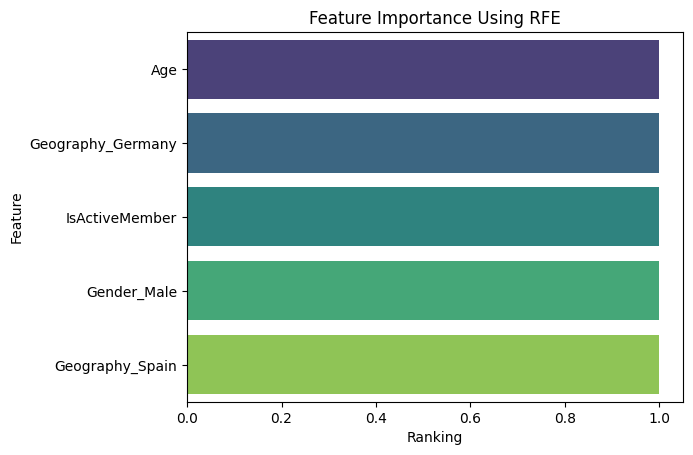

In [73]:
from sklearn.feature_selection import RFE

rfe = RFE(svc, n_features_to_select=5)
rfe.fit(X_train_balanced, y_train_balanced)

feature_ranks = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rfe.ranking_
}).sort_values(by="Ranking")

sns.barplot(x="Ranking", y="Feature", data=feature_ranks, palette="viridis")
plt.title("Feature Importance Using RFE")
plt.show()


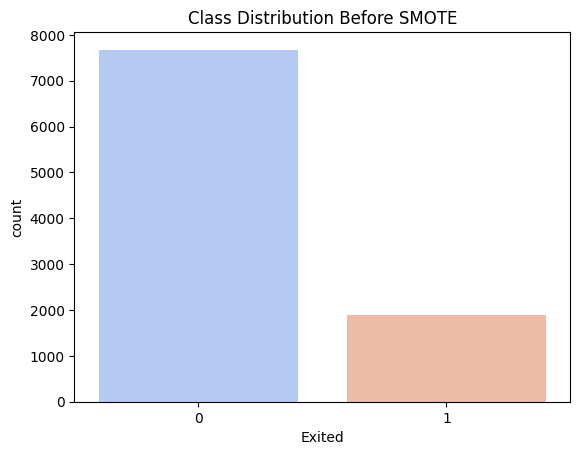

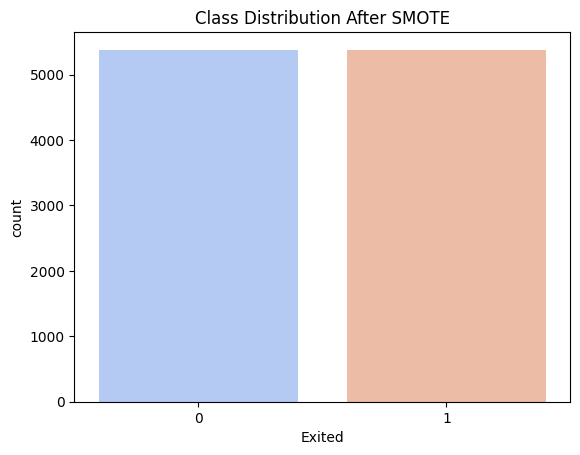

In [74]:
sns.countplot(x=y, palette="coolwarm")
plt.title("Class Distribution Before SMOTE")
plt.show()

sns.countplot(x=y_train_balanced, palette="coolwarm")
plt.title("Class Distribution After SMOTE")
plt.show()


In [75]:
# Evaluate the model on the test set
test_predictions = svm_model.predict(X_test)

# Metrics
test_accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1142
           1       0.42      0.75      0.54       294

    accuracy                           0.73      1436
   macro avg       0.67      0.74      0.67      1436
weighted avg       0.82      0.73      0.76      1436



Class 0 (Not Exited)

    Precision (0.92):
        92% of the instances predicted as "0" are correct.
        Indicates the model is good at avoiding false positives for this class.
    Recall (0.73):
        73% of actual "0" instances were correctly predicted.
        Shows some false negatives exist.
    F1-Score (0.81):
        Combines precision and recall into a single metric.
    Support (1142):
        Indicates that 1142 actual instances belong to class "0".

Class 1 (Exited)

    Precision (0.42):
        Only 42% of the instances predicted as "1" are correct.
        Highlights a higher rate of false positives for this class.
    Recall (0.75):
        75% of actual "1" instances were correctly predicted.
        Shows the model is better at identifying "1" instances but at the cost of precision.
    F1-Score (0.54):
        Lower than the F1-score for class "0", indicating the model struggles with class "1".
    Support (294):
        Indicates that 294 actual instances belong to class "1".

Overall Metrics

    Accuracy (0.73):
        The model correctly predicted 73% of all instances in the dataset.

    Macro Average:
        Precision (0.67): Average precision across both classes, treating them equally.
        Recall (0.74): Average recall across both classes.
        F1-Score (0.67): Average F1-score across both classes.

    Weighted Average:
        Accounts for class imbalance by giving more weight to the metrics of class "0" (the majority class).
        Precision (0.82): Slightly higher due to the dominance of class "0".
        Recall (0.73): Reflects overall recall weighted by support.
        F1-Score (0.76): Balances the model's performance across both classes.



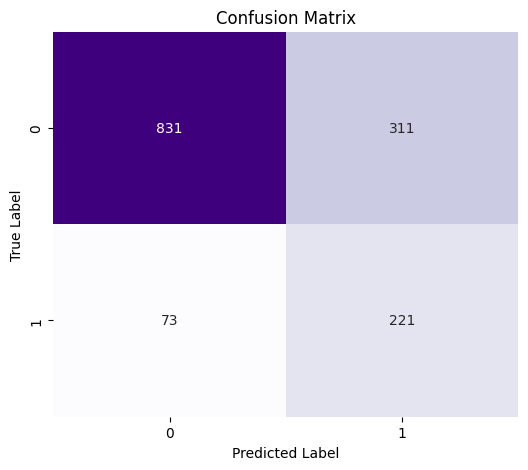

In [76]:
# Visualize the Confusion Matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(conf_matrix)

#### Key Insights

    Imbalance Handling:
        The report reflects an imbalanced dataset (support for class "0" is much larger than class "1").
        Precision for class "1" is low, meaning the model struggles with false positives for this minority class.

    Trade-Offs:
        The high recall for class "1" (0.75) indicates the model identifies most of the exiting customers but sacrifices precision.
        A low F1-score for class "1" (0.54) suggests room for improvement, especially in handling the minority class.

    Overall Performance:
        While the model achieves decent overall accuracy (0.73), the classification of the minority class ("1") is less reliable.
        Techniques like better hyperparameter tuning, rebalancing the dataset, or trying other algorithms could help.

In [77]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    SVC(class_weight='balanced', random_state=42),
    param_distributions=param_grid,
    n_iter=5,  # Test 5 combinations
    cv=3,      # Reduce folds
    scoring='f1',
    random_state=42,
    n_jobs=-1  # Utilize all CPU cores
)

# Fit on a smaller subset
X_sample, _, y_sample, _ = train_test_split(X_train_balanced, y_train_balanced, test_size=0.7, random_state=42)
random_search.fit(X_sample, y_sample)

# Best parameters and retraining
print("Best Parameters:", random_search.best_params_)
best_svm = random_search.best_estimator_
best_svm.fit(X_train_balanced, y_train_balanced)

# Evaluate on test set
best_test_predictions = best_svm.predict(X_test)
print("\nBest Model Classification Report:")
print(classification_report(y_test, best_test_predictions))





Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1142
           1       0.42      0.74      0.54       294

    accuracy                           0.74      1436
   macro avg       0.67      0.74      0.68      1436
weighted avg       0.82      0.74      0.76      1436



After modify the hyper paramtere of "c (reguralization parameter)" and the "gamma" it give the same value no change , given that should use an oversampling techniques to balance the data and try less efficient result (0.74) for a recall as it was up (0.75) for this the first choose was better  

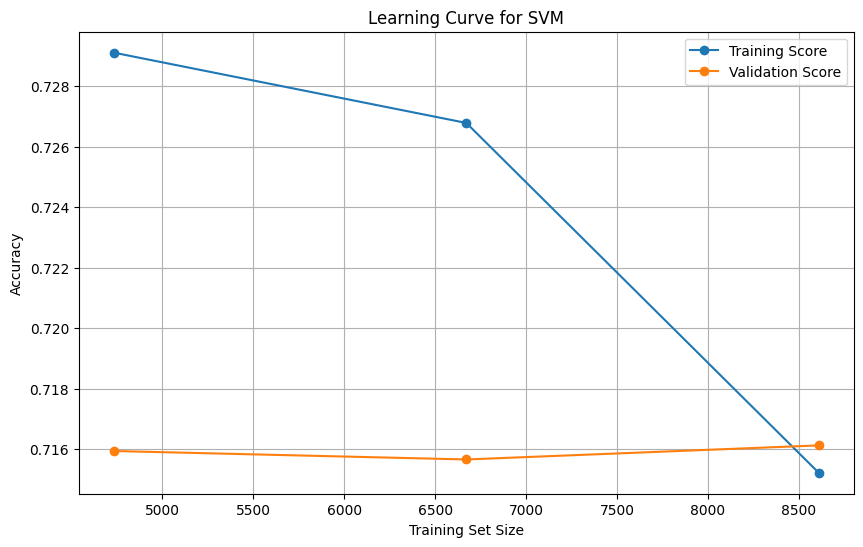

In [78]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(best_svm, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Score', marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for SVM")
plt.legend()
plt.grid()
plt.show()


This learning curve depicts the training score and validation score for an SVM classifier as a function of the training set size
### Key Observations

    Training Score (Blue Line):
        The training score starts high (around 0.728) with smaller training data sizes.
        As the training set size increases, the score decreases steadily and ends around 0.716 for the largest dataset size.
        This behavior is expected as the model is exposed to more data, making it harder to perfectly fit all instances (reducing overfitting).

    Validation Score (Orange Line):
        The validation score remains almost constant around 0.716 across all training sizes.
        This suggests that the model's performance on unseen data does not improve significantly with the addition of more training data.

    Gap Between Training and Validation Scores:
        There is a small gap between the training and validation scores initially, but this gap reduces as the training size increases.
        This indicates that the model generalizes reasonably well but has limited improvement on validation performance even with more data.

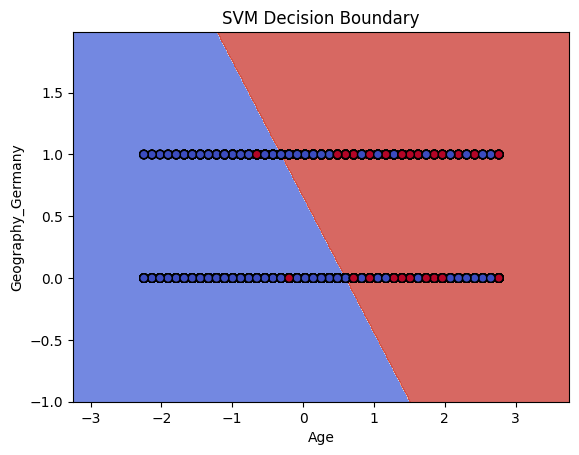

In [79]:
# Select two features for visualization
X_vis = X[['Age', 'Geography_Germany']]
y_vis = y
best_svm.fit(X_vis, y_vis)

x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_vis['Age'], X_vis['Geography_Germany'], c=y_vis, edgecolor='k', cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Geography_Germany")
plt.title("SVM Decision Boundary")
plt.show()

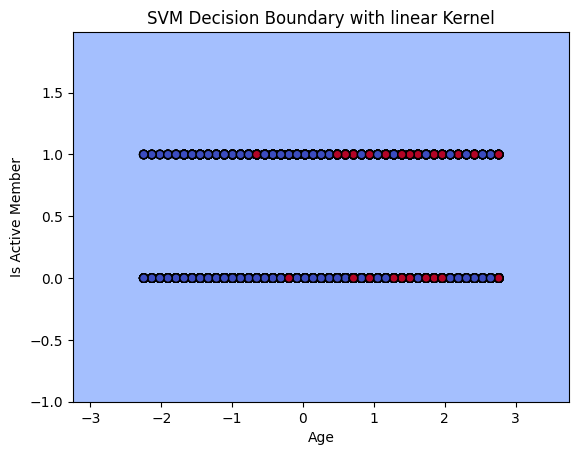

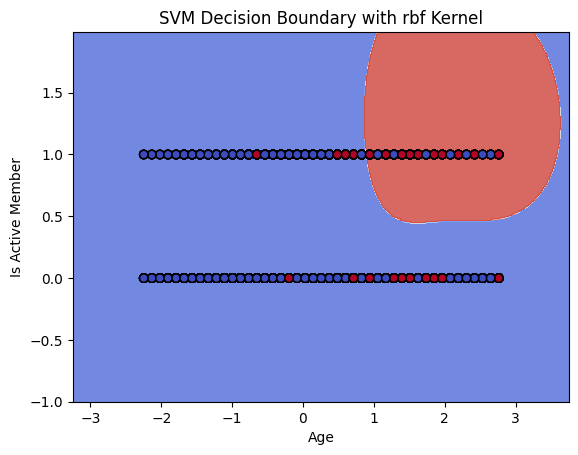

In [80]:
kernels = ['linear', 'rbf']
for kernel in kernels:
    svc = SVC(kernel=kernel, C=1.0, random_state=42)
    svc.fit(X_vis, y_vis)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X_vis['Age'], X_vis['Geography_Germany'], c=y_vis, edgecolor='k', cmap="coolwarm")
    plt.xlabel("Age")
    plt.ylabel("Is Active Member")
    plt.title(f"SVM Decision Boundary with {kernel} Kernel")
    plt.show()



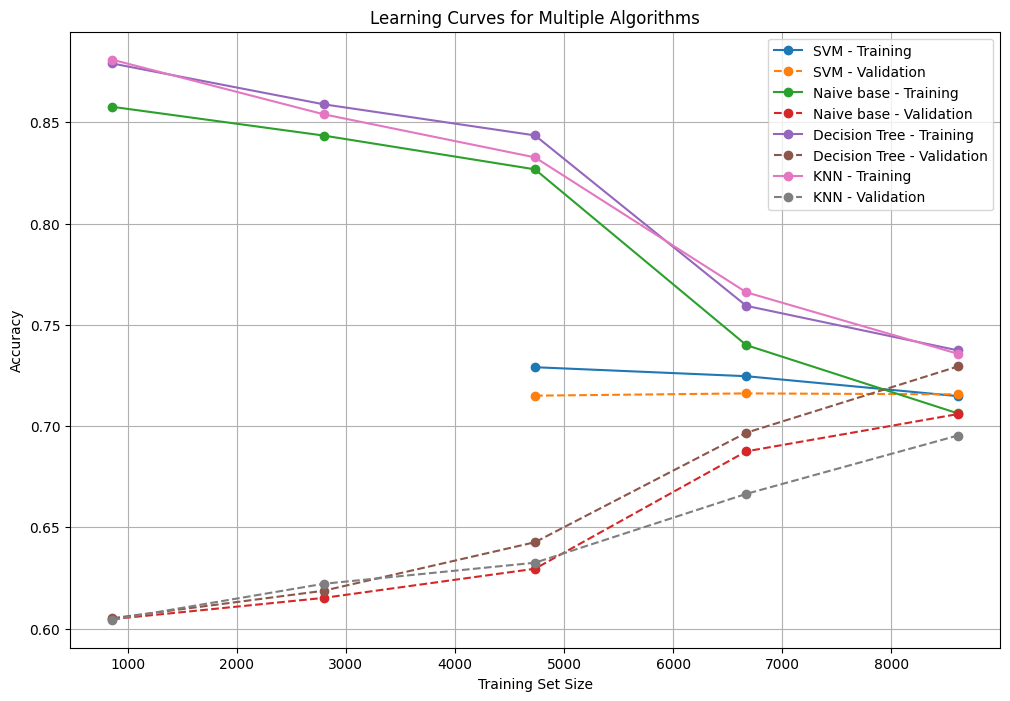

In [81]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Function to plot learning curves for multiple models
def plot_combined_learning_curves(models, X_train, y_train, cv=5, scoring='accuracy'):
    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring=scoring)
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)

        # Plot learning curve
        plt.plot(train_sizes, train_mean, marker='o', label=f'{name} - Training')
        plt.plot(train_sizes, test_mean, marker='o', linestyle='--', label=f'{name} - Validation')

    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curves for Multiple Algorithms")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage with algorithms from your notebook
models = {
    'SVM': svm_model,
    'Naive base':nb_model ,
    'Decision Tree': best_model,
    'KNN':knn
}


# Plot combined learning curves
plot_combined_learning_curves(models, X_train_balanced, y_train_balanced)


### Explanation of the Learning Curves for Multiple Algorithms
 compares the training and validation accuracy for multiple machine learning algorithms (SVM, Naive Bayes, Decision Tree, and KNN) as a function of the training set size.

 #### Key Observations

    SVM (Blue and Orange Lines):
        Training Score (Blue): The accuracy remains relatively stable, with a slight decline as the training set size increases, indicating a good balance between learning and generalization.
        Validation Score (Orange): The validation accuracy is constant and lower than the training score, showing a small performance gap. This suggests that the SVM is slightly underfitting and may require hyperparameter tuning to improve performance.

    Naive Bayes (Green and Red Lines):
        Training Score (Green): The accuracy starts high but decreases consistently as the training set grows. This is typical for probabilistic models when exposed to more varied data.
        Validation Score (Red): The validation accuracy remains consistently lower than the training accuracy, with a visible gap. This indicates underfitting and limited capacity of the Naive Bayes algorithm for this problem.

    Decision Tree (Purple and Pink Lines):
        Training Score (Purple): The training accuracy starts very high (close to 1), indicating that the model is overfitting the data when the training set is small.
        Validation Score (Pink): The validation accuracy declines as the training size increases, showing poor generalization. Decision Trees tend to overfit unless properly regularized (e.g., using pruning, max depth, or minimum samples).

    KNN (Brown and Gray Lines):
        Training Score (Brown): The training accuracy starts very low and gradually improves as more data is added, but it remains relatively low.
        Validation Score (Gray): The validation accuracy also improves slightly with more data but remains lower than the training accuracy. This suggests that KNN is struggling with the complexity of the problem, likely due to insufficient neighbors or poor distance metric selection.

### Insights

    SVM:
        Performs consistently across training and validation sets.
        Slight underfitting but better generalization compared to other algorithms.

    Naive Bayes:
        Simple model that is likely not capturing the complexity of the dataset.
        Shows consistent underfitting and may require feature transformations or engineering.

    Decision Tree:
        Highly overfits the training data, especially with smaller datasets.
        Poor generalization to the validation set, which could be mitigated with hyperparameter tuning or ensemble methods (e.g., Random Forest).

    KNN:
        Struggles with both training and validation performance.
        Likely needs hyperparameter tuning (e.g., number of neighbors, distance metric) or a more suitable feature representation.
